# Analysing Egyptian Data of Food Prices

**By Ahmed Khaled**

In this notebook, we look forward to answering the following questions based on the provided data:

1. What are the overall average prices for each product ?
1. What are the monthly-averaged prices of each product at each year ?
1. What are the yearly-averaged prices of each product at each month ?
1. In which year the largest average price rise/fall happened for each product?

## 0. Importing Libraries

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Cleaning

### 1.1. Data Reading

In [142]:
food_data = pd.read_csv("food-data.csv")
food_data.head()

,date,category,commodity,unit,price
0,15-08-10,cereals and tubers,Potatoes,KG,1.81
1,15-08-10,cereals and tubers,Rice,KG,3.98
2,15-08-10,cereals and tubers,Wheat flour,KG,3.44
3,15-08-10,"meat, fish and eggs",Meat (beef),KG,50.22
4,15-08-10,"meat, fish and eggs","Meat (chicken, frozen)",KG,17.00


In [143]:
food_data.describe(include="all")

,date,category,commodity,unit,price
count,1893,1893,1893,1893,1893.000000
unique,136,7,24,5,NaN
top,15-12-15,oil and fats,Potatoes,KG,NaN
freq,19,440,136,1457,NaN
mean,NaN,NaN,NaN,NaN,21.391712
std,NaN,NaN,NaN,NaN,29.080559
min,NaN,NaN,NaN,NaN,0.660000
25%,NaN,NaN,NaN,NaN,5.450000
50%,NaN,NaN,NaN,NaN,11.650000
75%,NaN,NaN,NaN,NaN,23.750000


In [144]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1893 non-null   object 
 1   category   1893 non-null   object 
 2   commodity  1893 non-null   object 
 3   unit       1893 non-null   object 
 4   price      1893 non-null   float64
dtypes: float64(1), object(4)
memory usage: 74.1+ KB


### 1.2. Date Conversion

We need to convert the `date` column to `datetime` object.

In [145]:
food_data['date'] = pd.to_datetime(food_data['date'], format = "%d-%m-%y")

In [146]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1893 non-null   datetime64[ns]
 1   category   1893 non-null   object        
 2   commodity  1893 non-null   object        
 3   unit       1893 non-null   object        
 4   price      1893 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 74.1+ KB


In [147]:
food_data.head()

,date,category,commodity,unit,price
0,2010-08-15,cereals and tubers,Potatoes,KG,1.81
1,2010-08-15,cereals and tubers,Rice,KG,3.98
2,2010-08-15,cereals and tubers,Wheat flour,KG,3.44
3,2010-08-15,"meat, fish and eggs",Meat (beef),KG,50.22
4,2010-08-15,"meat, fish and eggs","Meat (chicken, frozen)",KG,17.00


### 1.3. Renaming Categories Properly

We are going to list all unique values of the `category` and `commodity`. Check if the names are meaningful and if not, change them.

In [148]:
for col in ['category', 'commodity']:
    print(f"For {col}")
    for value in food_data[col].unique():
        print(f"{value}, ", end = "")
    print()

For category
cereals and tubers, meat, fish and eggs, miscellaneous food, oil and fats, pulses and nuts, vegetables and fruits, milk and dairy, 
For commodity
Potatoes, Rice, Wheat flour, Meat (beef), Meat (chicken, frozen), Sugar, Ghee (artificial), Ghee (natural), Oil (maize), Beans (fava, dry), Garlic, Onions (white), Tomatoes, Lentils, Onions (red), Pasta, Eggs, Oil (sunflower), Fish (tilapia), Meat (beef, without bones), Cheese, Cheese (picon), Milk, Oil (mixed), 


`Category` column combines the `Commodity` values into subgroups. As we want to study each product on its own, we should go with the `Commodity` column. However, some of its value can be renamed more clearly. Also, we can combine some commodities that are really similar together to reduce the number of classes for better visualizations.

In [149]:
food_data['commodity'] = food_data['commodity'].replace({
    "Meat (beef)": "Beef",
    "Meat (chicken, frozen)": "Chicken",
    "Ghee (artificial)": "Ghee",
    "Ghee (natural)": "Ghee",
    "Oil (maize)": "Oil",
    "Beans (fava, dry)": "Beans",
    "Onions (white)": "Onions",
    "Onions (red)": "Onions",
    "Oil (sunflower)": "Oil",
    "Fish (tilapia)": "Fish",
    "Meat (beef, without bones)": "Beef",
    "Cheese (picon)": "Cheese",
    "Oil (mixed)": "Oil"
})

In [150]:
len(food_data['commodity'].unique())

18

We are going to drop the `category` as we won't need it later...

In [151]:
food_data.drop(columns=['category'], inplace=True)

### 1.4. Check Products' Units

In [152]:
for commodity in food_data.commodity.unique():
    subdata = food_data[food_data.commodity == commodity]
    print(f"For {commodity} we have ")
    for unit in subdata.unit.unique():
        print(f" {unit} ", end = "")
    print()

For Potatoes we have 
 KG 
For Rice we have 
 KG 
For Wheat flour we have 
 KG 
For Beef we have 
 KG 
For Chicken we have 
 KG 
For Sugar we have 
 KG 
For Ghee we have 
 KG 
For Oil we have 
 800 G  L 
For Beans we have 
 KG 
For Garlic we have 
 KG 
For Onions we have 
 KG 
For Tomatoes we have 
 KG 
For Lentils we have 
 KG 
For Pasta we have 
 KG 
For Eggs we have 
 Unit 
For Fish we have 
 KG 
For Cheese we have 
 KG  168 G 
For Milk we have 
 L 


We have 2 products with different units; oil and cheese. And we have milk, eggs, oil with units rather than KG which is the dominant unit in the data. So for better visualizations, we can discard those whose unit isn't KG and unify the units for KG.

> Cheese (168 G / KG) : we can multiply by 1000/168 for those with 168 G as their unit.


In [153]:
liter_products = ['Eggs', 'Oil', 'Milk']

liter_indexes = food_data[food_data.commodity.isin(liter_products)].index

food_data.drop(index = liter_indexes, inplace=True)

In [154]:
# Convert the price of the `Cheese` of `168 G` to `KG` by multiplying with 1000/168

food_data.loc[(food_data.unit == "168 G"), 'price'] = food_data.loc[(food_data.unit == "168 G"), 'price'] * 1000 / 168
food_data.loc[(food_data.unit == "168 G"), 'unit'] = 'KG'

In [155]:
food_data.unit.unique()

array(['KG'], dtype=object)

In [156]:
for commodity in food_data.commodity.unique():
    subdata = food_data[food_data.commodity == commodity]
    print(f"For {commodity} we have ")
    for unit in subdata.unit.unique():
        print(f" {unit} ", end = "")
    print()

For Potatoes we have 
 KG 
For Rice we have 
 KG 
For Wheat flour we have 
 KG 
For Beef we have 
 KG 
For Chicken we have 
 KG 
For Sugar we have 
 KG 
For Ghee we have 
 KG 
For Beans we have 
 KG 
For Garlic we have 
 KG 
For Onions we have 
 KG 
For Tomatoes we have 
 KG 
For Lentils we have 
 KG 
For Pasta we have 
 KG 
For Fish we have 
 KG 
For Cheese we have 
 KG 


## 3. Data Visualization

### 3.1. What are the products with the highest averaging prices ?

In [194]:
food_data_prices_average = food_data.groupby(by='commodity').agg({"price": [np.mean, np.std]}).reset_index()
food_data_prices_average.columns = ["commodity", "avg_price", "std_price"]
food_data_prices_average_sorted = food_data_prices_average.sort_values(by="avg_price").reset_index()

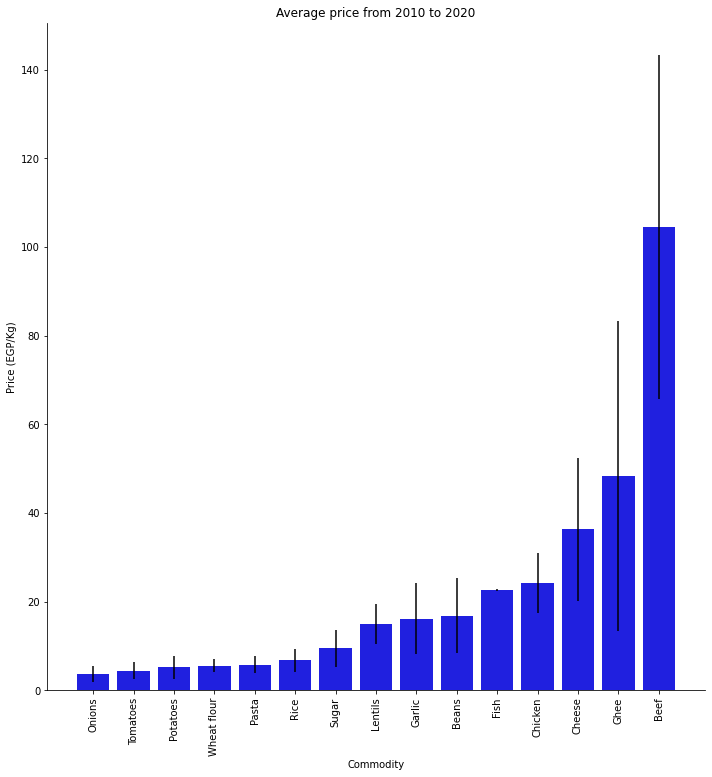

In [199]:
sns.catplot(
    data = food_data_prices_average_sorted,
    x = "commodity",
    y = "avg_price",
    kind = "bar",
    height = 10,
    color="b"
)

# plot error bars for each commodity
for index, row in food_data_prices_average_sorted.iterrows():
    plt.vlines(x=index, ymin=row['avg_price'] - row['std_price'], ymax=row['avg_price'] + row['std_price'], color="black")
plt.ylabel("Price (EGP/Kg)")
plt.xlabel("Commodity")
plt.title("Average price from 2010 to 2020")
plt.xticks(rotation=90);

### For each product, what were the average prices for each year ?

In [115]:
food_data.head(1)

,date,commodity,unit,price
0,2010-08-15,Potatoes,KG,1.81


In [116]:
food_data.tail(1)

,date,commodity,unit,price
1892,2021-12-15,Tomatoes,KG,4.11


The data contains each month from 2010 to 2021. We will create a column with the year of the date and aggregate the price at each year.

In [247]:
food_data_year = food_data.copy()

food_data_year['year'] = food_data_year.apply(lambda row: row['date'].year, axis = 1)
food_data_year['month'] = food_data_year.apply(lambda row: row['date'].month, axis = 1)
food_data_year['day'] = food_data_year.apply(lambda row: row['date'].day, axis = 1)

In [258]:
commodity_year = food_data_year.groupby(by=["year", "month", "commodity"]).agg({"price": np.mean}).reset_index()

In [372]:
commodity_year["beef_ghee"] = commodity_year.apply(lambda row: 'yes' if row['commodity'] in ["Beef", "Ghee"] else 'no', axis = 1)

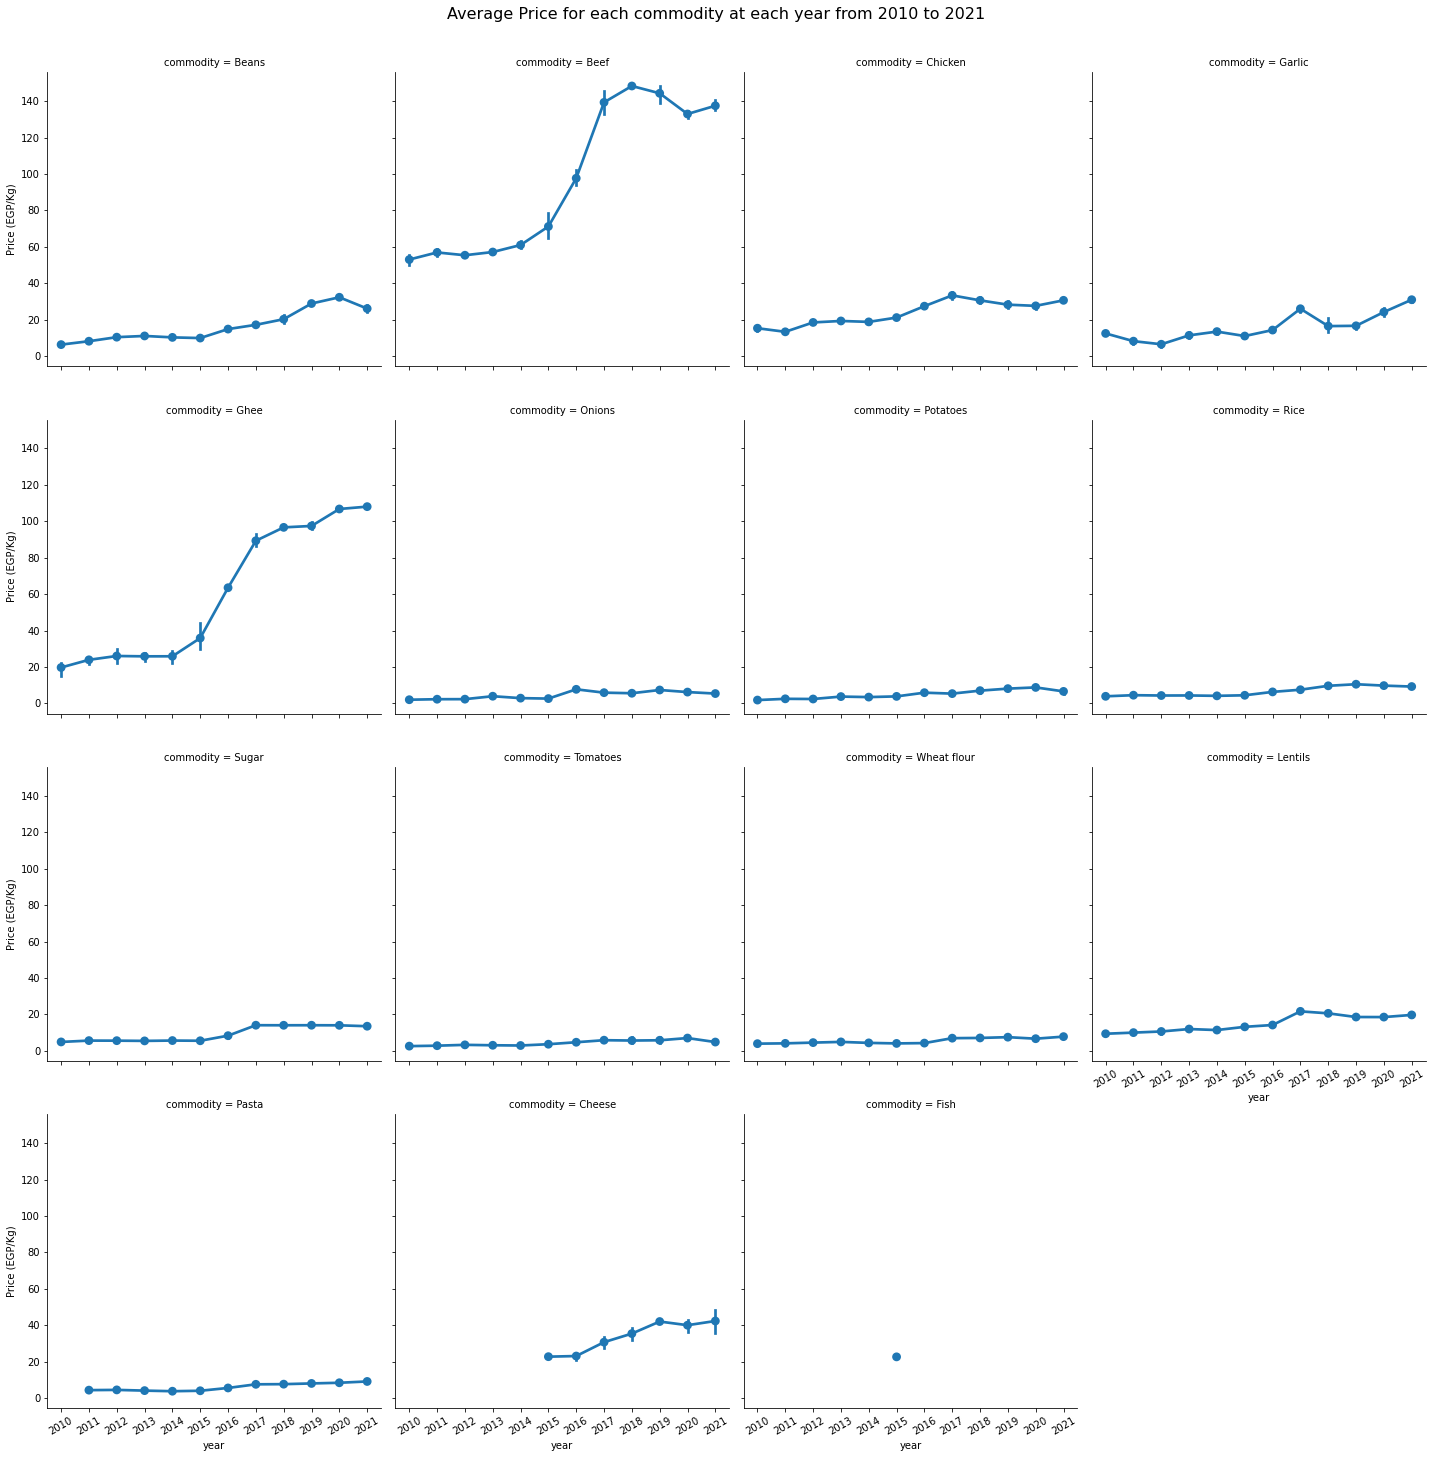

In [374]:
g = sns.catplot(
    data = commodity_year,
    x = 'year',
    y = 'price',
    col = 'commodity',
    col_wrap = 4,
    kind = "point",
)

for ax in g.axes:
    ax.set_ylabel("Price (EGP/Kg)")
    ax.set_xticklabels(range(2010, 2021+1), rotation=30)
    
g.fig.suptitle("Average Price for each commodity at each year from 2010 to 2021", fontsize=16,  y=1.01)
g.fig.tight_layout();

Beef and Ghee have the biggest yearly-averaged prirce rises, we may want to change their color to bring more attenion.

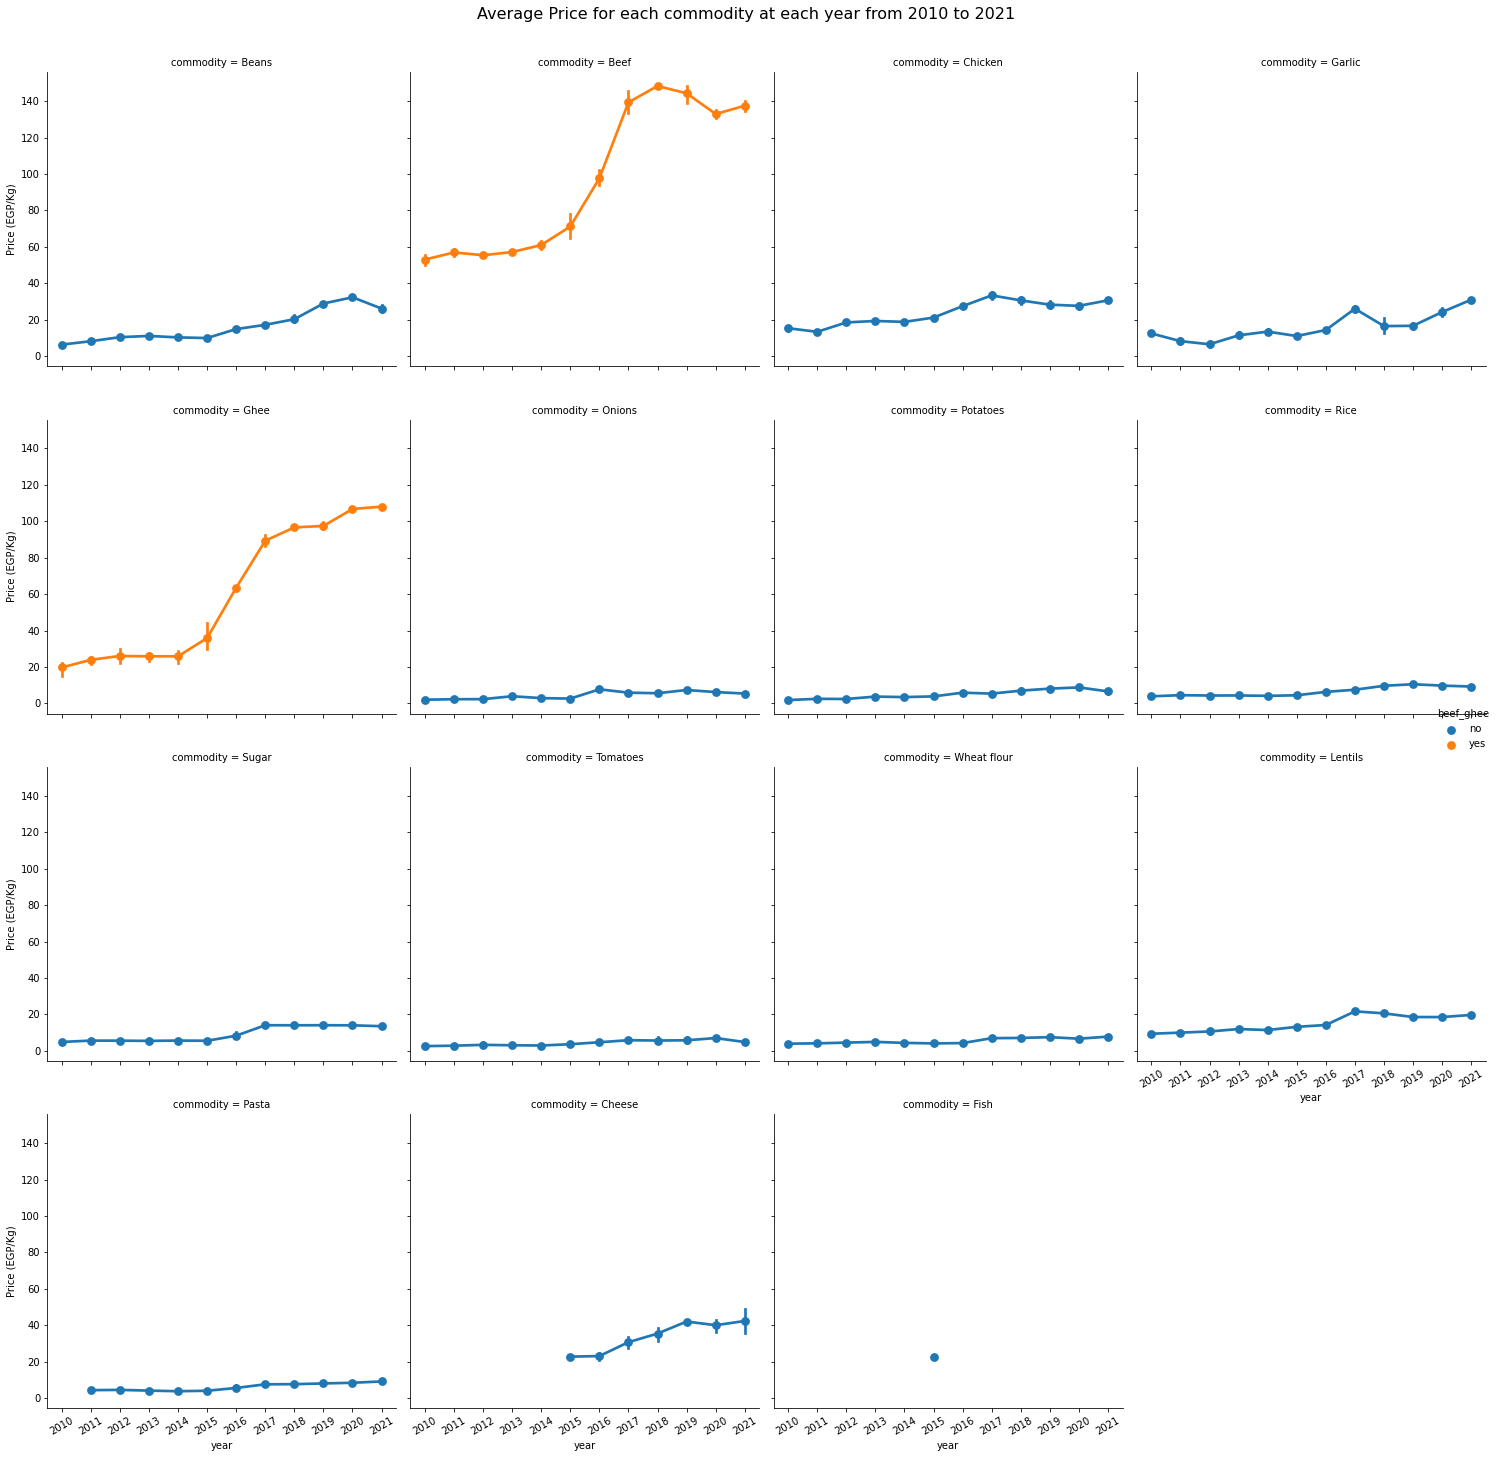

In [373]:
g = sns.catplot(
    data = commodity_year,
    x = 'year',
    y = 'price',
    col = 'commodity',
    col_wrap = 4,
    kind = "point",
    hue = "beef_ghee"
)

for ax in g.axes:
    ax.set_ylabel("Price (EGP/Kg)")
    ax.set_xticklabels(range(2010, 2021+1), rotation=30)
    
g.fig.suptitle("Average Price for each commodity at each year from 2010 to 2021", fontsize=16,  y=1.01)
g.fig.tight_layout();

### For each product, what were the average prices at each month ?

1.0


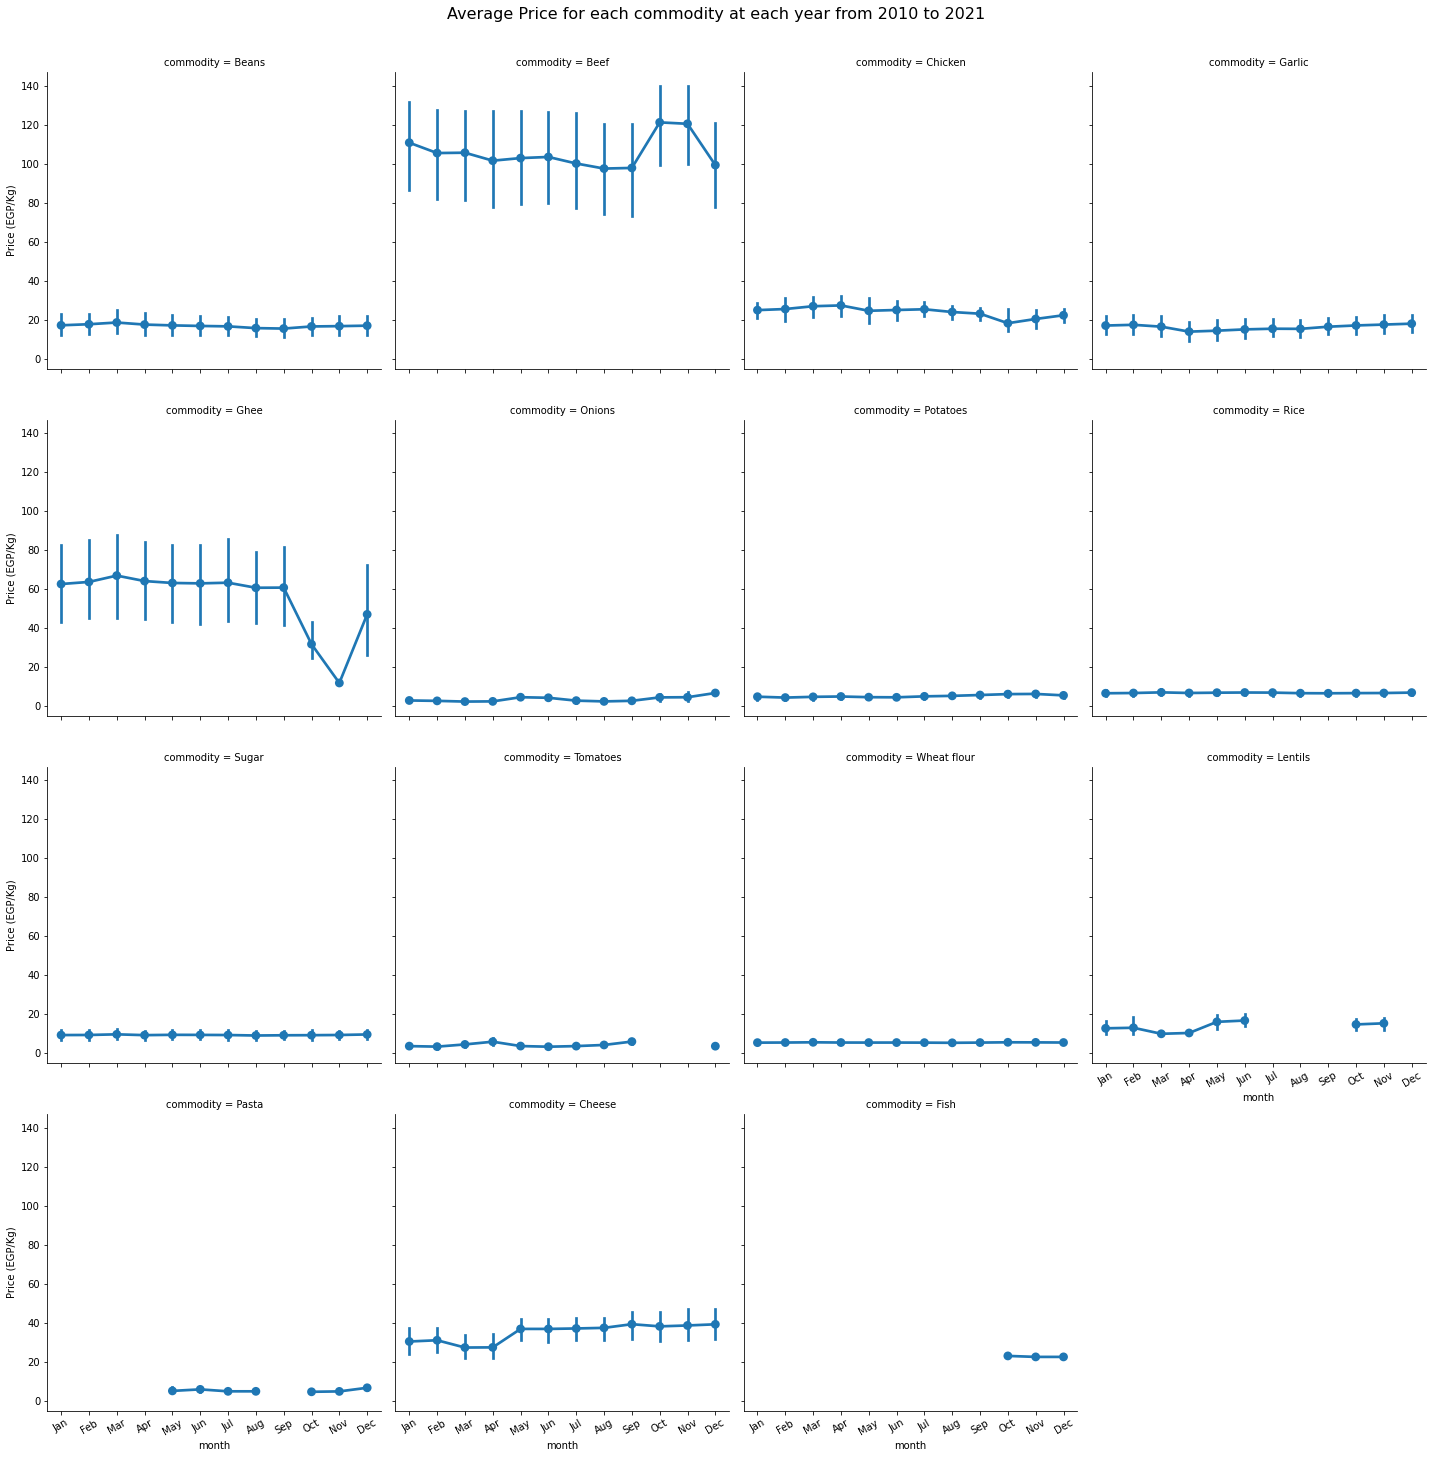

In [288]:
g = sns.catplot(
    data = commodity_year,
    x = 'month',
    y = 'price',
    col = 'commodity',
    col_wrap = 4,
    kind = "point",
)

for ax in g.axes:
    ax.set_ylabel("Price (EGP/Kg)")
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=30)
    
g.fig.suptitle("Average Price for each commodity at each year from 2010 to 2021", fontsize=16,  y=1.01)
g.fig.tight_layout();

We may want to focus on Beef and Ghee by changing their colors to red. We can use `hue` with a custom column.

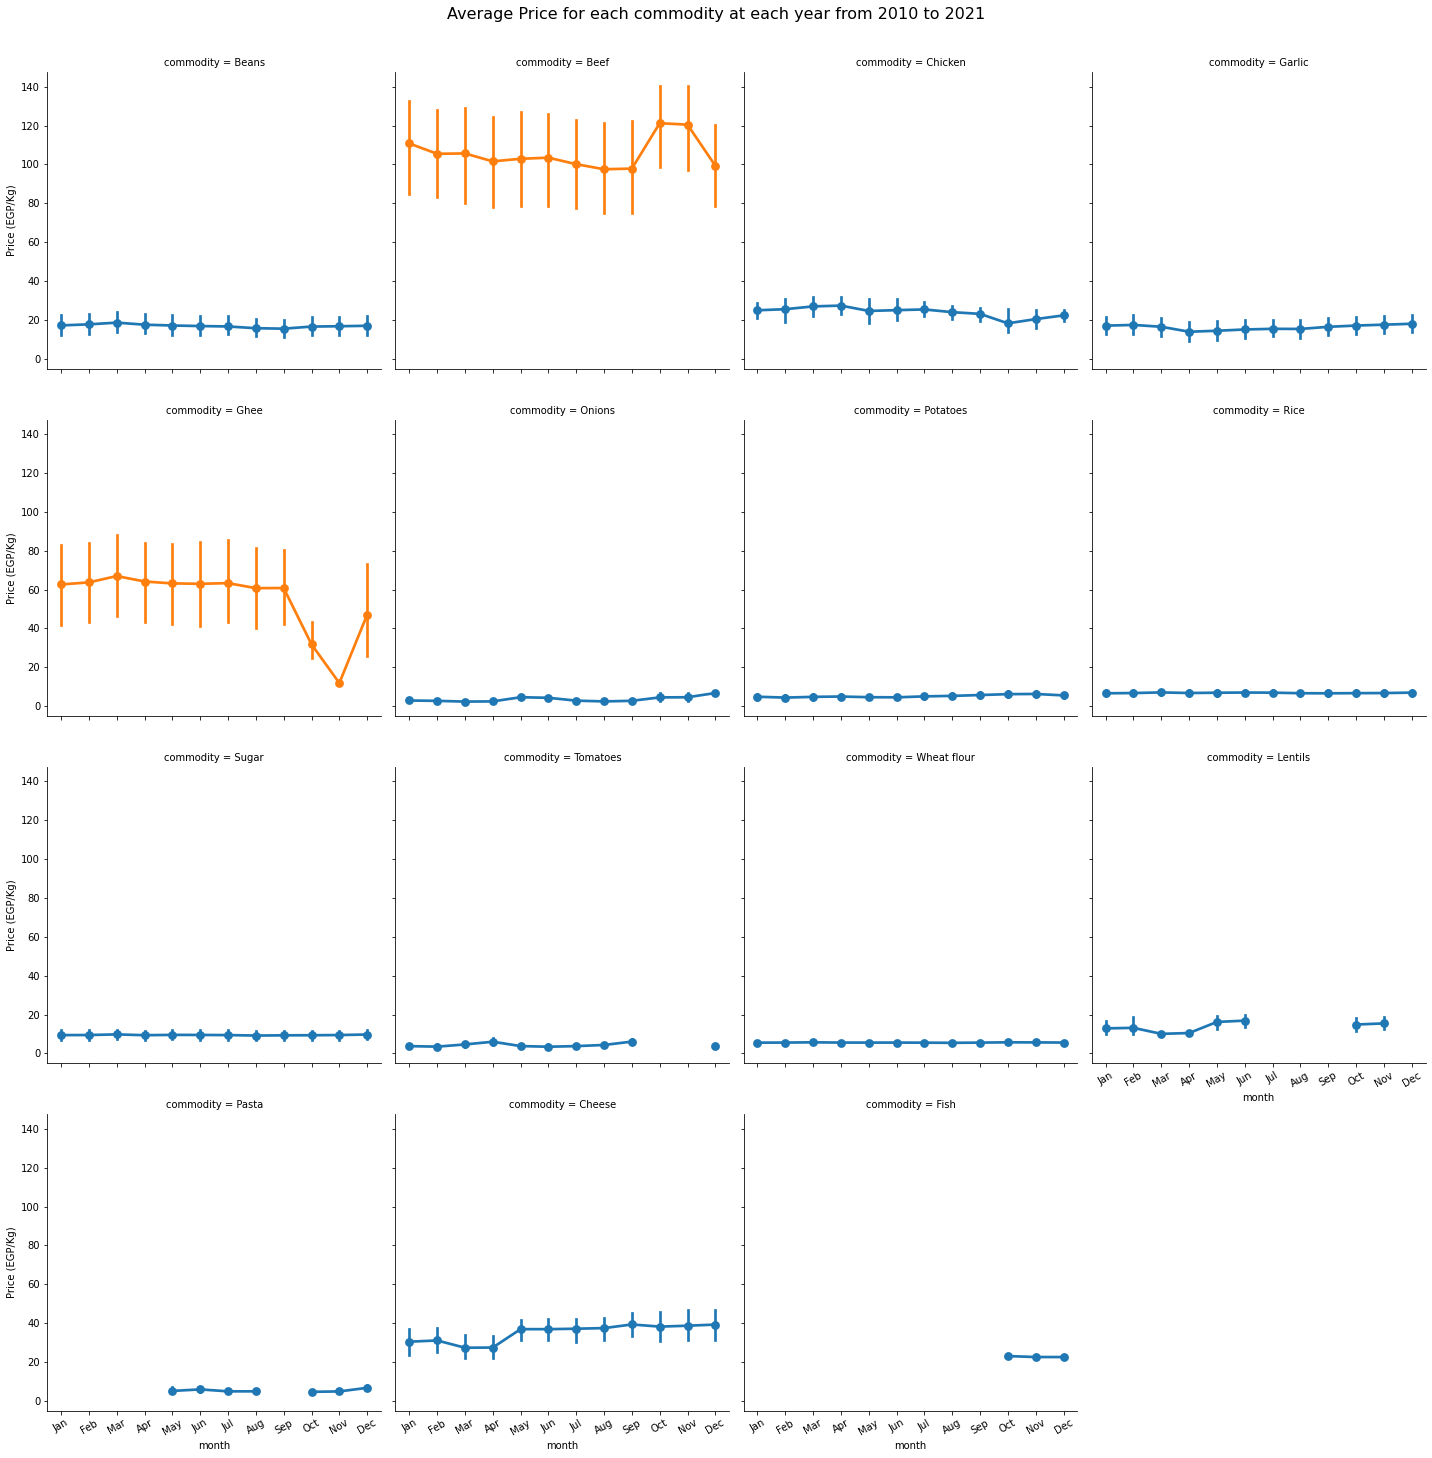

In [291]:
g = sns.catplot(
    data = commodity_year,
    x = 'month',
    y = 'price',
    col = 'commodity',
    col_wrap = 4,
    kind = "point",
    hue = "beef_ghee",
    legend = None
)

for ax in g.axes:
    ax.set_ylabel("Price (EGP/Kg)")
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=30)
    
g.fig.suptitle("Average Price for each commodity at each year from 2010 to 2021", fontsize=16,  y=1.01)
g.fig.tight_layout();

### In which year the largest average price rise/fall happened for each product?

We are going to calculate the largest rise and fall of price for each product,

In [308]:
price_rises = dict()

for commodity in food_data.commodity.unique():
    commodity_subdata = food_data[food_data.commodity == commodity]
    if commodity_subdata.shape[0] == 1:
        continue # skip which has only one price
    for index, row in commodity_subdata.iterrows():
        if index == 0:
            last_price = row["price"]
            continue
        current_price = row["price"]
        rise = current_price - last_price
        if price_rises.get(commodity) is None:
            price_rises[commodity] = [rise, row['date']]
        elif rise > price_rises[commodity][0]:
            price_rises[commodity] = [rise, row['date']]
        last_price = row["price"]
        

In [354]:
rises_df = pd.DataFrame(price_rises).transpose()
rises_df.columns = ["Rise", "Date"]
rises_df["year"] = rises_df.apply(lambda row: row["Date"].year, axis = 1)
rises_df

,Rise,Date,year
Potatoes,2.6,2015-10-15,2015
Rice,1.51,2015-10-15,2015
Wheat flour,1.55,2013-10-15,2013
Beef,41.59,2010-08-15,2010
Chicken,7.29,2019-05-15,2019
Sugar,3.0,2016-11-15,2016
Ghee,38.2,2015-09-15,2015
Beans,5.5,2016-10-15,2016
Garlic,5.8,2012-09-15,2012
Onions,5.25,2016-12-15,2016


In [323]:
from datetime import datetime, timedelta # to adjust annotations

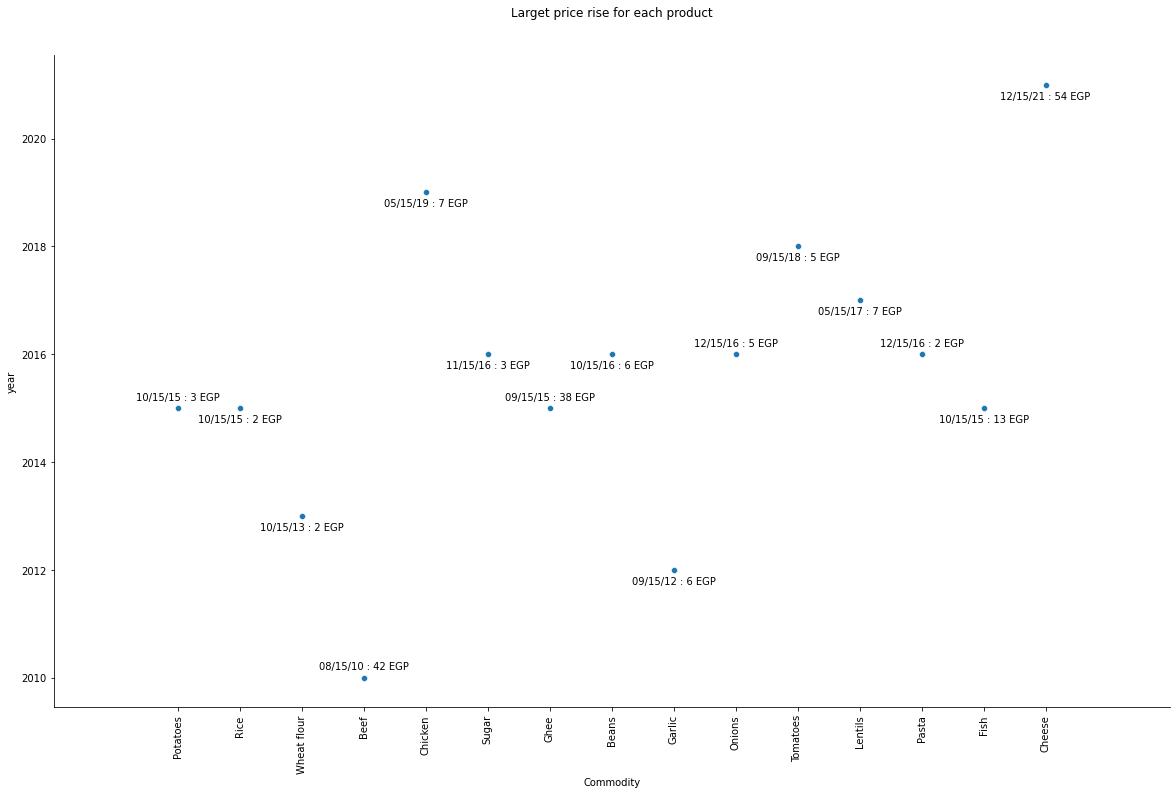

In [371]:
plt.figure(figsize=(20, 12))
sns.scatterplot(
    data = rises_df,
    x = rises_df.index,
    y = "year",
)

for i, (index, row) in enumerate(rises_df.iterrows()):
    date = row['Date']
    year = row["year"]
    rise = row['Rise']
    if i % 3 == 0:
        xy = (index, year + 0.3)
        align = "top"
    else:
        xy = (index, year - 0.3)
        align = "bottom"
    plt.annotate(f"{date.strftime('%x')} : {round(rise)} EGP", xy=xy, ha = "center", va=align, size = 10)
    

plt.xlabel("Commodity")
sns.despine()
plt.xlim(-2, 16)
plt.xticks(rotation = 90)
plt.title("Larget price rise for each product", y=1.05);